In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/cleaned_dataset_flight.csv')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
DayOfWeek,0
Date,0
DepTime,0
ArrTime,0
CRSArrTime,0
UniqueCarrier,0
Airline,0
FlightNum,0
TailNum,0
ActualElapsedTime,0


**Route and Airport-Level Analysis**

In [ ]:
# Top 10 origin-destination pairs
top_routes = df['Route'].value_counts().head(10)
display(top_routes)

,count
Route,
ORD-LGA,1920
LGA-ORD,1615
LAX-SFO,1603
SFO-LAX,1457
LAS-LAX,1305
HOU-DAL,1276
DAL-HOU,1200
ORD-LAX,1154
PHX-LAS,1152


In [ ]:
# Top 10 origin airports
top_origin_airports = df['Origin'].value_counts().head(10)
display(top_origin_airports)

,count
Origin,
ORD,46945
DFW,33027
ATL,28834
DEN,23542
LAX,17194
LAS,15528
SFO,14825
PHX,13873
MDW,9318


In [ ]:
# Top 10 destination airports
top_destination_airports = df['Dest'].value_counts().head(10)
display(top_destination_airports)

,count
Dest,
ORD,40622
DFW,24543
ATL,23557
DEN,19249
LAX,18350
SFO,15721
LAS,14929
PHX,12517
LGA,10692


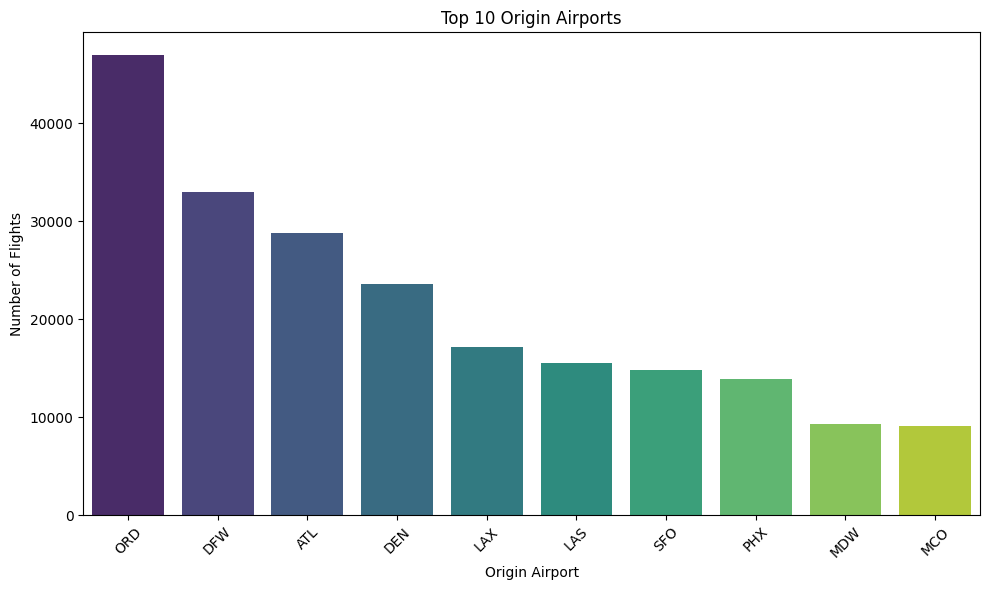

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize top 10 origin airports
plt.figure(figsize=(10, 6))
sns.barplot(x=top_origin_airports.index, y=top_origin_airports.values, hue=top_origin_airports.index, palette='viridis', legend=False)
plt.title('Top 10 Origin Airports')
plt.xlabel('Origin Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

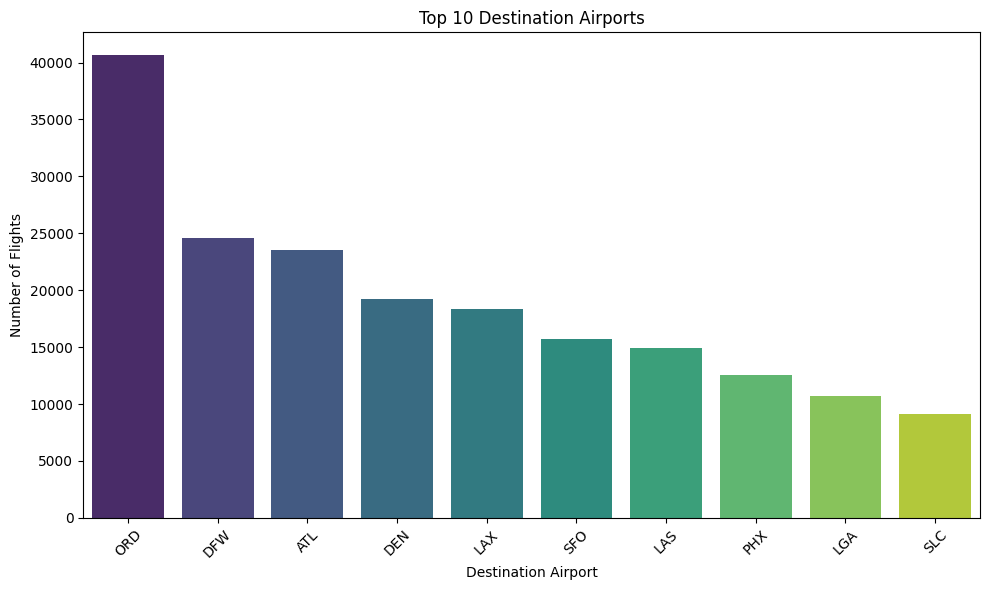

In [ ]:
# Visualize top 10 destination airports
plt.figure(figsize=(10, 6))
sns.barplot(x=top_destination_airports.index, y=top_destination_airports.values, hue=top_destination_airports.index, palette='viridis', legend=False)
plt.title('Top 10 Destination Airports')
plt.xlabel('Destination Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

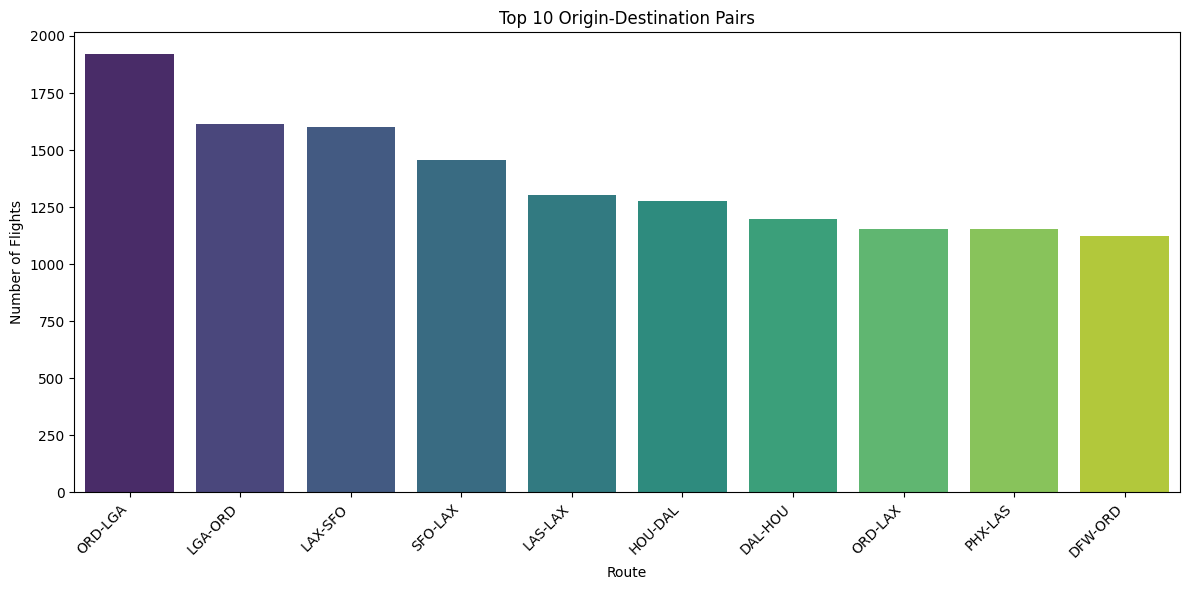

In [ ]:
# Visualize top 10 origin-destination pairs
plt.figure(figsize=(12, 6))
sns.barplot(x=top_routes.index, y=top_routes.values, hue=top_routes.index, palette='viridis', legend=False)
plt.title('Top 10 Origin-Destination Pairs')
plt.xlabel('Route')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right') # Rotate labels and align to the right
plt.tight_layout()
plt.show()

In [ ]:
# Calculate average arrival and departure delays per route
avg_delays_by_route = df.groupby('Route')[['ArrDelay', 'DepDelay']].mean().reset_index()
display(avg_delays_by_route.head())

,Route,ArrDelay,DepDelay
0,ABE-ATL,89.353846,84.938462
1,ABE-CLT,71.333333,65.166667
2,ABE-CVG,55.000000,48.000000
3,ABE-ORD,86.911765,76.602941
4,ABI-DFW,100.898089,96.821656


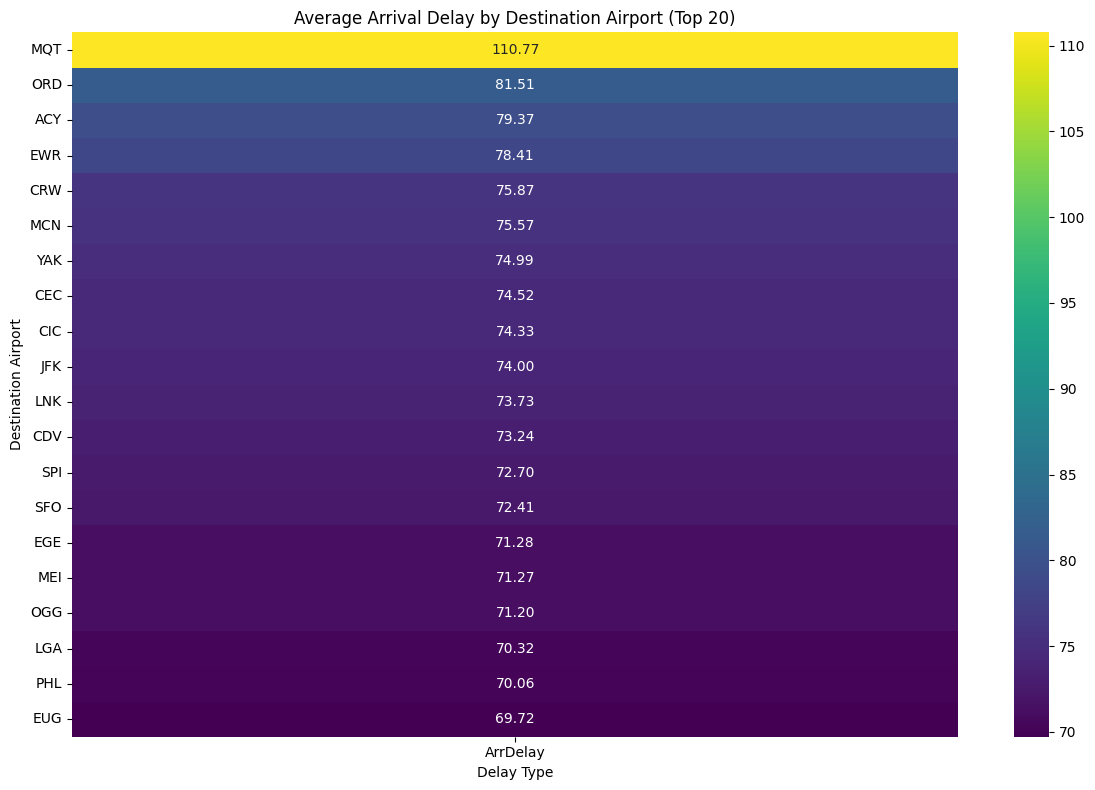

In [ ]:
# Calculate average arrival delays by destination airport
avg_arrival_delays_by_dest = df.groupby('Dest')['ArrDelay'].mean().reset_index()

# Sort destination airports by average arrival delay and select the top 20
top_20_dest_airports_arr_delay = avg_arrival_delays_by_dest.sort_values(by='ArrDelay', ascending=False).head(20)

# Create a heatmap for average arrival delays by destination airport
plt.figure(figsize=(12, 8))
sns.heatmap(top_20_dest_airports_arr_delay.set_index('Dest'), annot=True, cmap='viridis', fmt=".2f")
plt.title('Average Arrival Delay by Destination Airport (Top 20)')
plt.xlabel('Delay Type')
plt.ylabel('Destination Airport')
plt.tight_layout()
plt.show()

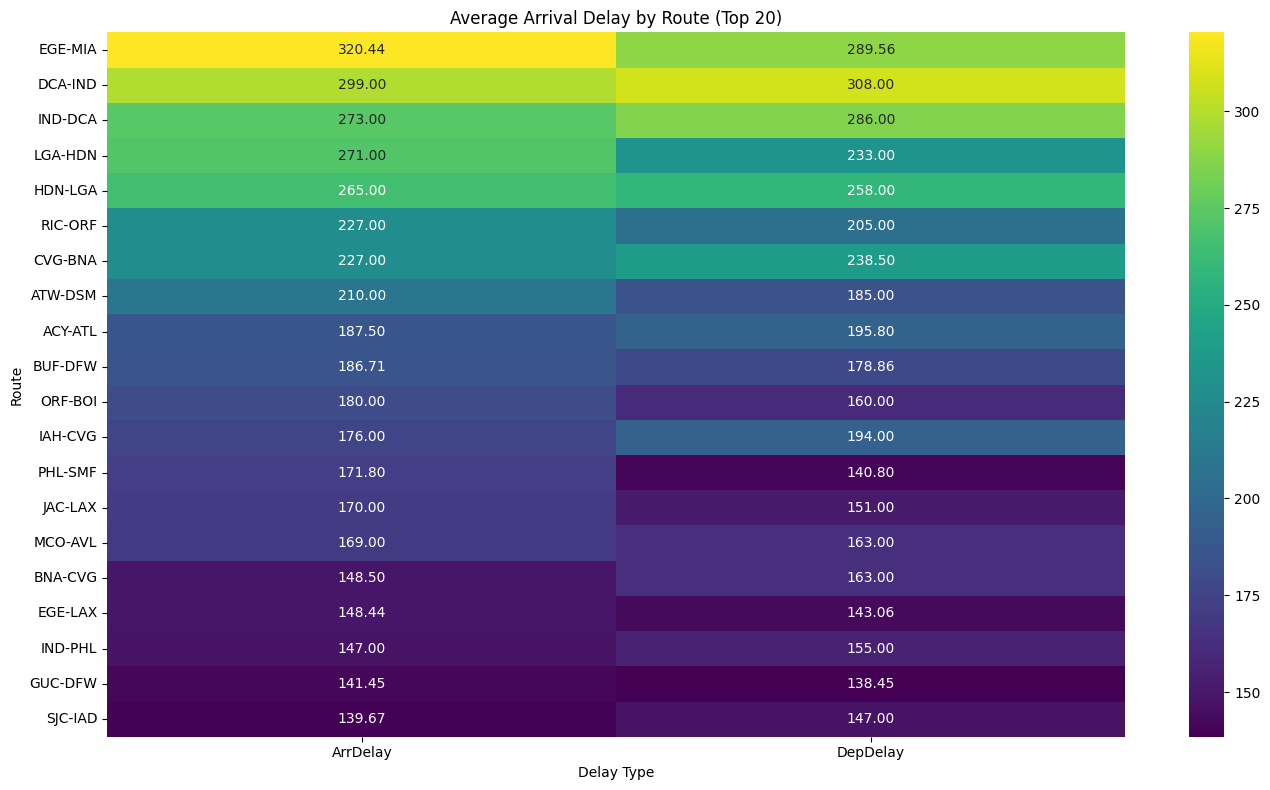

In [ ]:
# Sort routes by average arrival delay and select the top 20
top_20_routes_arr_delay = avg_delays_by_route.sort_values(by='ArrDelay', ascending=False).head(20)

# Create a heatmap for average arrival delays by route
plt.figure(figsize=(14, 8))
sns.heatmap(top_20_routes_arr_delay.set_index('Route'), annot=True, cmap='viridis', fmt=".2f")
plt.title('Average Arrival Delay by Route (Top 20)')
plt.xlabel('Delay Type')
plt.ylabel('Route')
plt.tight_layout()
plt.show()

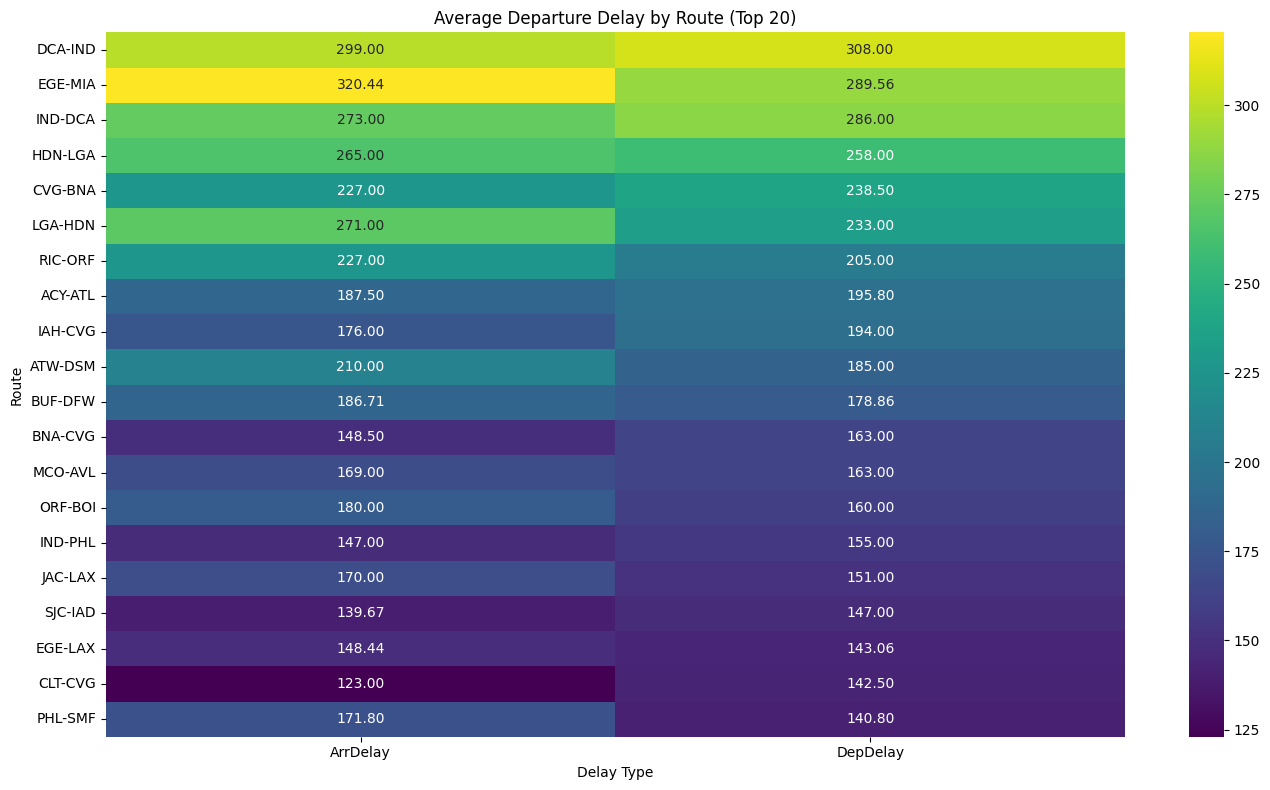

In [ ]:
# Sort routes by average departure delay and select the top 20
top_20_routes_dep_delay = avg_delays_by_route.sort_values(by='DepDelay', ascending=False).head(20)

# Create a heatmap for average departure delays by route
plt.figure(figsize=(14, 8))
sns.heatmap(top_20_routes_dep_delay.set_index('Route'), annot=True, cmap='viridis', fmt=".2f")
plt.title('Average Departure Delay by Route (Top 20)')
plt.xlabel('Delay Type')
plt.ylabel('Route')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate average arrival and departure delays per origin airport
avg_delays_by_origin = df.groupby('Origin')[['ArrDelay', 'DepDelay']].mean()
display(avg_delays_by_origin.head())

,ArrDelay,DepDelay
Origin,,
ABE,86.921986,79.553191
ABI,100.898089,96.821656
ABQ,50.931923,50.514541
ABY,66.427184,64.203883
ACT,61.608696,61.188406


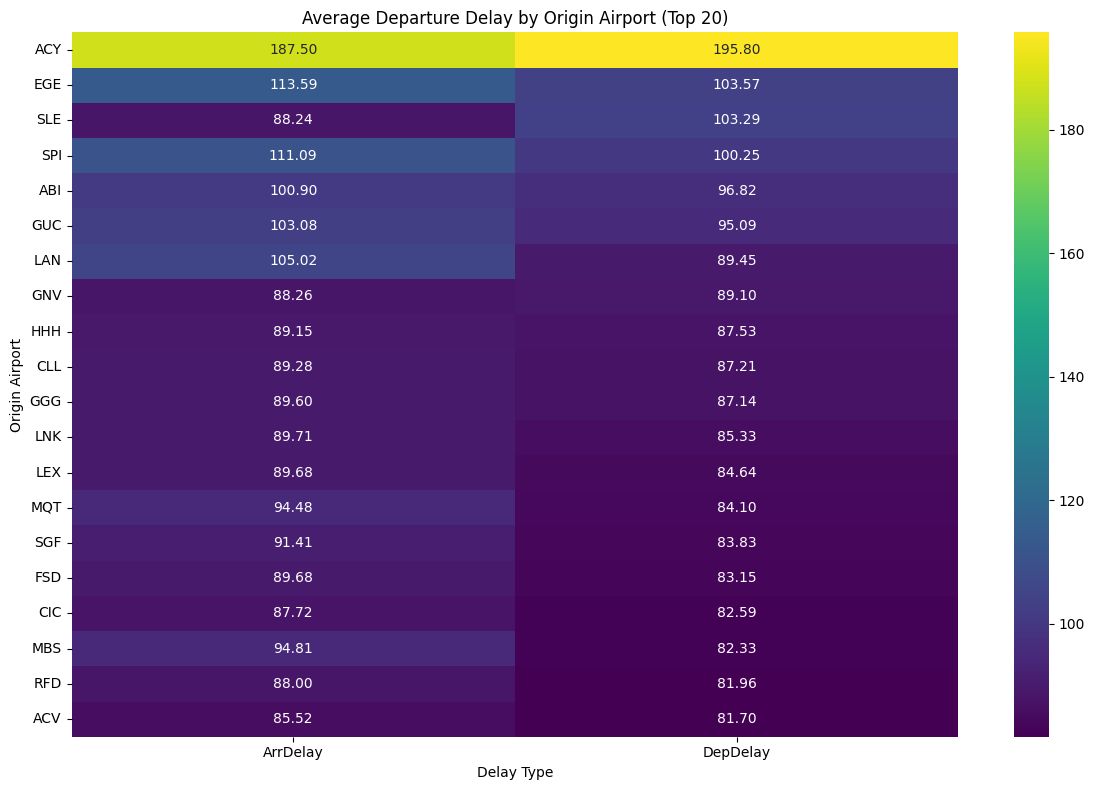

In [ ]:
# Sort origin airports by average departure delay and select the top 20
top_20_origin_airports_dep_delay = avg_delays_by_origin.sort_values(by='DepDelay', ascending=False).head(20)

# Create a heatmap for average departure delays by origin airport
plt.figure(figsize=(12, 8))
sns.heatmap(top_20_origin_airports_dep_delay, annot=True, cmap='viridis', fmt=".2f")
plt.title('Average Departure Delay by Origin Airport (Top 20)')
plt.xlabel('Delay Type')
plt.ylabel('Origin Airport')
plt.tight_layout()
plt.show()

To visualize airport data on a map, I'll use a dataset containing airport codes and their geographic coordinates. I'll then merge this with the flight data to display airport activity and average delays on a map.

In [ ]:
# Download a dataset with airport coordinates
!curl -O https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat

# Load the airport data into a pandas DataFrame
airports_df = pd.read_csv('airports.dat', header=None, usecols=[4, 6, 7], names=['Airport', 'Latitude', 'Longitude'])

# Display the first few rows of the airports DataFrame
display(airports_df.head())

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1100k  100 1100k    0     0  2875k      0 --:--:-- --:--:-- --:--:-- 2874k


,Airport,Latitude,Longitude
0,GKA,-6.081690,145.391998
1,MAG,-5.207080,145.789001
2,HGU,-5.826790,144.296005
3,LAE,-6.569803,146.725977
4,POM,-9.443380,147.220001


Now, I'll combine the airport coordinate data with the flight data to prepare for mapping.

In [ ]:
# Merge airport coordinates with average delays by origin airport
avg_delays_by_origin_geo = avg_delays_by_origin.reset_index().merge(airports_df, left_on='Origin', right_on='Airport', how='inner')

# Merge airport coordinates with average arrival delays by destination airport
avg_arrival_delays_by_dest_geo = avg_arrival_delays_by_dest.merge(airports_df, left_on='Dest', right_on='Airport', how='inner')

# Merge airport coordinates with top origin airports data
top_origin_airports_geo = top_origin_airports.reset_index().merge(airports_df, left_on='Origin', right_on='Airport', how='inner').rename(columns={'index': 'Origin', 'count': 'FlightCount'})

# Merge airport coordinates with top destination airports data
top_destination_airports_geo = top_destination_airports.reset_index().merge(airports_df, left_on='Dest', right_on='Airport', how='inner').rename(columns={'index': 'Dest', 'count': 'FlightCount'})

display(avg_delays_by_origin_geo.head())
display(avg_arrival_delays_by_dest_geo.head())
display(top_origin_airports_geo.head())
display(top_destination_airports_geo.head())

,Origin,ArrDelay,DepDelay,Airport,Latitude,Longitude
0,ABE,86.921986,79.553191,ABE,40.652100,-75.440804
1,ABI,100.898089,96.821656,ABI,32.411301,-99.681900
2,ABQ,50.931923,50.514541,ABQ,35.040199,-106.609001
3,ABY,66.427184,64.203883,ABY,31.535500,-84.194504
4,ACT,61.608696,61.188406,ACT,31.611300,-97.230499


,Dest,ArrDelay,Airport,Latitude,Longitude
0,ABE,68.899543,ABE,40.652100,-75.440804
1,ABI,55.853211,ABI,32.411301,-99.681900
2,ABQ,50.374278,ABQ,35.040199,-106.609001
3,ABY,55.938462,ABY,31.535500,-84.194504
4,ACT,47.502203,ACT,31.611300,-97.230499


,Origin,FlightCount,Airport,Latitude,Longitude
0,ORD,46945,ORD,41.978600,-87.904800
1,DFW,33027,DFW,32.896801,-97.038002
2,ATL,28834,ATL,33.636700,-84.428101
3,DEN,23542,DEN,39.861698,-104.672997
4,LAX,17194,LAX,33.942501,-118.407997


,Dest,FlightCount,Airport,Latitude,Longitude
0,ORD,40622,ORD,41.978600,-87.904800
1,DFW,24543,DFW,32.896801,-97.038002
2,ATL,23557,ATL,33.636700,-84.428101
3,DEN,19249,DEN,39.861698,-104.672997
4,LAX,18350,LAX,33.942501,-118.407997


Now I'll create interactive maps to visualize the data.

In [ ]:
import folium
from folium.plugins import HeatMap

# Create a map centered around the average location of the airports
map_center = [avg_delays_by_origin_geo['Latitude'].mean(), avg_delays_by_origin_geo['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=4)

# Add markers for average departure delays by origin airport
for index, row in avg_delays_by_origin_geo.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['DepDelay'] / 20,  # Scale marker size by delay
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        tooltip=f"Origin: {row['Origin']}<br>Avg Departure Delay: {row['DepDelay']:.2f} min"
    ).add_to(m)

# Calculate the bounding box of the points
min_lat = avg_delays_by_origin_geo['Latitude'].min()
max_lat = avg_delays_by_origin_geo['Latitude'].max()
min_lon = avg_delays_by_origin_geo['Longitude'].min()
max_lon = avg_delays_by_origin_geo['Longitude'].max()
m.fit_bounds([[min_lat, min_lon], [max_lat, max_lon]])

# Display the map
display(m)

In [ ]:
# Create a map centered around the average location of the airports
map_center = [airports_df['Latitude'].mean(), airports_df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=4)

# Add markers for average arrival delays by destination airport
for index, row in avg_arrival_delays_by_dest_geo.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['ArrDelay'] / 20,  # Scale marker size by delay
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        tooltip=f"Destination: {row['Dest']}<br>Avg Arrival Delay: {row['ArrDelay']:.2f} min"
    ).add_to(m)

# Calculate the bounding box of the points
min_lat = avg_arrival_delays_by_dest_geo['Latitude'].min()
max_lat = avg_arrival_delays_by_dest_geo['Latitude'].max()
min_lon = avg_arrival_delays_by_dest_geo['Longitude'].min()
max_lon = avg_arrival_delays_by_dest_geo['Longitude'].max()
m.fit_bounds([[min_lat, min_lon], [max_lat, max_lon]])

# Display the map
display(m)

In [ ]:
# Create a map centered around the average location of the airports
map_center = [airports_df['Latitude'].mean(), airports_df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=4)

# Add markers for top origin airports by flight count
for index, row in top_origin_airports_geo.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['FlightCount'] / 500,  # Scale marker size by flight count
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.6,
        tooltip=f"Origin: {row['Origin']}<br>Flight Count: {row['FlightCount']}"
    ).add_to(m)

# Display the map
display(m)